<a href="https://colab.research.google.com/github/mylethidiem/ProgramingTech/blob/main/preAIO25/warmup/exercise_w5/Exercise_suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1Mj_Yfej3DOWb-Z5YltIiUPIAdChymJN-
!gdown 1txvLRxtzV5e4eySXCbn63V_bmta51eWO
!gdown 10W9X5HdyuzTnt1Mp4Q8RRxVfD2eKGNTz
!gdown 1mLE66pd8hVFmqwTvRw4AXGxXW7m3mUcz

Downloading...
From: https://drive.google.com/uc?id=1Mj_Yfej3DOWb-Z5YltIiUPIAdChymJN-
To: /content/object.png
100% 195k/195k [00:00<00:00, 52.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1txvLRxtzV5e4eySXCbn63V_bmta51eWO
To: /content/nature.jpg
100% 163k/163k [00:00<00:00, 52.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=10W9X5HdyuzTnt1Mp4Q8RRxVfD2eKGNTz
To: /content/background2.png
100% 470k/470k [00:00<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mLE66pd8hVFmqwTvRw4AXGxXW7m3mUcz
To: /content/background1.png
100% 6.89k/6.89k [00:00<00:00, 16.8MB/s]


# 2. Basic matrix with numpy

## Tạo một ma trận với numpy

In [ ]:
import numpy as np

# Tạo một ma trận với kích thước 2x3
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

## Phép cộng ma trận


In [ ]:
import numpy as np
# Tạo hai ma trận A và B
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# Thực hiện cộng ma trận
C = A + B

print("A + B:\n", C)

## np.stack()

In [ ]:
import numpy as np

# Tạo 2 array 1D
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

# Stack các array theo một trục
stacked_arr = np.stack((arr1, arr2))

print("Array sau khi stack:\n", stacked_arr)

## np.sum()

In [ ]:
import numpy as np

# Tạo một tensor 2D
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Tính tổng theo từng dòng (axis=1)
row_sum = np.sum(arr, axis=1)
print("Tổng theo dòng:", row_sum)

# Tính tổng theo từng cột (axis=0)
column_sum = np.sum(arr, axis=0)
print("Tổng theo cột:", column_sum)

## np.where

In [ ]:
import numpy as np

# Tạo một tensor 3D
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Sử dụng hàm where để tạo ra tensor mới có giá trị các phần tử lớn hơn 5 được thay thế bằng 0, các phần tử còn lại thì giữ nguyên.
new_arr = np.where(arr > 5, 0, arr)

# In ra tensor mới
print(new_arr)

# 4. Experiments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def computeBinaryMask(difference_single_channel, threshold=15):
    # Áp dụng ngưỡng (threshold) để tạo mask nhị phân
    # Các điểm ảnh có sự chênh lệch màu sắc lớn hơn hoặc bằng 15 được đặt là 255 (trắng), còn lại là 0 (đen).
    difference_binary = np.where(difference_single_channel >= threshold, 255, 0)

    # Ghép nối mask nhị phân thành 3 kênh để phù hợp với định dạng RGB.
    binary_binary = np.stack((difference_binary,)*3, axis=-1)

    return binary_binary


def computeDifference(bg_img, input_img):
    # Tính toán giá trị khác biệt tuyệt đối giữa hai hình ảnh
    bg_img = np.float32(bg_img)
    input_img = np.float32(input_img)
    difference_three_channel = np.abs(bg_img - input_img)

    # Chuyển đổi sự khác biệt 3 kênh sang một kênh bằng cách tính trung bình.
    # Điều này giúp giảm dữ liệu khác biệt xuống một giá trị cường độ đơn lẻ.
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0

    # Chuyển đổi trở lại sang uint8 để phù hợp với xử lý ảnh.
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel


def replaceBackGround(bg_image1, bg_image2, ob_image):
    # Tính toán sự khác biệt giữa hình ảnh đối tượng và hình nền thứ nhất
    difference_single_channel = computeDifference(bg_image1, ob_image)

    # Tính toán mask nhị phân dựa trên sự khác biêt
    binary_mask = computeBinaryMask(difference_single_channel)
    plt.imshow(binary_mask)

    # Thay thế hình nền:
    # ở vị trí mà mask là trắng (255): thay thế bằng hình nền thứ hai.
    # ở vị trí mà mask là đen (0): giữ hình ảnh đối tượng.
    output = np.where(binary_mask == 255, ob_image, bg_image2)

    return output

In [4]:
# Load các ảnh input
bg_image1 = cv2.imread('background1.png')
bg_image2 = cv2.imread('background2.png')
ob_image  = cv2.imread('object.png')

# Resize kích thuớc ảnh đầu vào
bg_image1 = cv2.resize(bg_image1, (640, 480))
bg_image2 = cv2.resize(bg_image2, (640, 480))
ob_image  = cv2.resize(ob_image,  (640, 480))

# Chuyển đổi ảnh màu từ hệ BRG sang hệ RGB
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)
bg_image2 = cv2.cvtColor(bg_image2, cv2.COLOR_BGR2RGB)
ob_image  = cv2.cvtColor(ob_image,  cv2.COLOR_BGR2RGB)

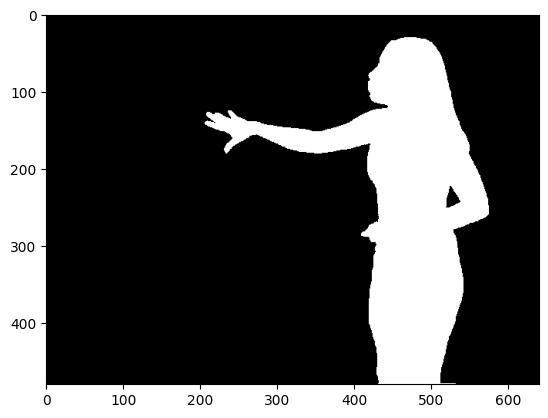

In [5]:
# Tiến hành background subtraction
output_image = replaceBackGround(bg_image1, bg_image2, ob_image)

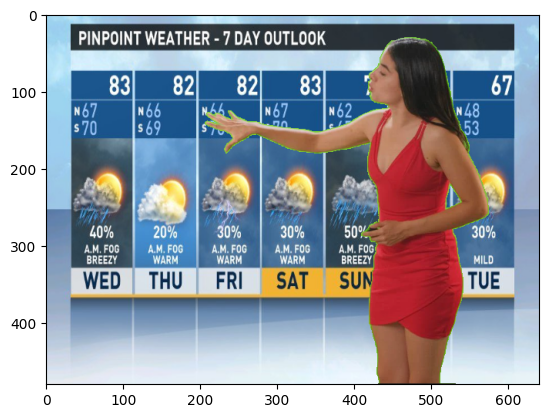

In [6]:
# Hiển thị kết quả
plt.imshow(output_image)

# 6. Exercise

## Câu 1

In [ ]:
import numpy as np

# Tạo hai array 1D
arr1 = np.array([2, 3, 4])
arr2 = np.array([5, 5, 7])

# Stack các array
stacked_arr = np.stack((arr1, arr2), axis=1)

print("Array đã stack:\n", stacked_arr)

## Câu 2

In [ ]:
import numpy as np

# Tạo 2 ma trận
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

# In ra kết quả
print(matrix1 + matrix2)

## Câu 3

In [ ]:
import numpy as np
# Tạo 2 ma trận
matrix1 = [[1, 2], [3, 4]]
matrix2 = [[5, 6], [7, 8]]

# In ra kết quả
print(matrix1 + matrix2)

## Câu 4

## Câu 5


In [ ]:
import numpy as np

array = np.array([1, 2, 3, 4, 5, 6])
result = np.where(array > 3, "A", "B")

print(result)

## Câu 6

In [ ]:
import cv2
import numpy as np

# Load các ảnh input
bg_image1 = cv2.imread('background1.png', 0)
ob_image  = cv2.imread('object.png', 0)

# Resize kích thước ảnh đầu vào về cùng kích thước
bg_image1 = cv2.resize(bg_image1, (640, 480))
ob_image  = cv2.resize(ob_image,  (640, 480))

# Chuyển đổi cân màu từ BRG sang RGB
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)
ob_image  = cv2.cvtColor(ob_image,  cv2.COLOR_BGR2RGB)

difference_three_channel = ############## Your code here ###############

# Câu 7

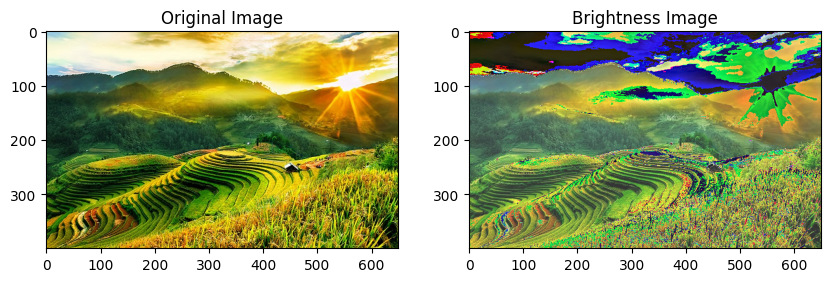

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
img = cv2.imread("nature.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Điều chỉnh độ sáng hình ảnh
new_img = img + 50
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)

# Hiển thị hình ảnh
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(new_img)
plt.title("Brightness Image")
plt.show()

# Câu 8

Text(0.5, 1.0, 'Cropped Image')

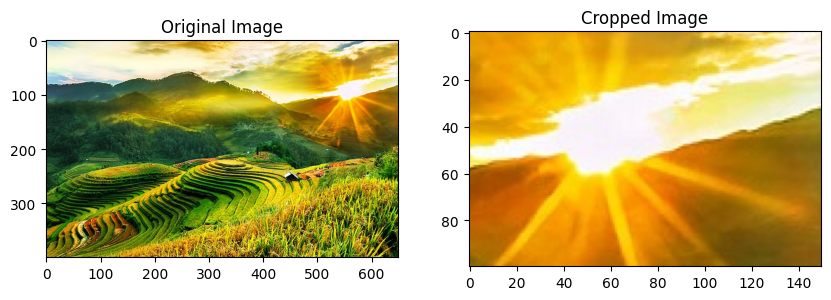

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
img = cv2.imread("nature.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# crop hình ảnh
crop_img = img[50:150, 500:700]

#Hiển thị hình ảnh
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(crop_img)
plt.title("Cropped Image")